In [ ]:
import pandas as pd
student_scores=pd.read_csv('student_scores.csv')
#student_scores.describe()
student_scores.describe(include='all')


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
student_scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
X=student_scores['Hours']   #creating the input variable X
y=student_scores['Scores']  #creating the output variable y
X=X.to_numpy()  #converting X to a numpy array
X1=X.reshape(-1,1)
print(X)
print(X1)


[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]
[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [ ]:
y=y.to_numpy()  #converting y to a numpy array
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [ ]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test= train_test_split(X1,y,test_size=0.30, random_state=1)
print('size of X is:', X1.shape)
print('size of X_test is:', X_test.shape)
print('size of X_train is:', X_train.shape)
#print(X1)
print(X_test)
#print(X_train)

size of X is: (25, 1)
size of X_test is: (8, 1)
size of X_train is: (17, 1)
[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]
 [7.7]
 [6.1]
 [7.4]]


In [ ]:
#Creating the regessor/model

#This is for a linear model
from sklearn.linear_model import LinearRegression
Mymodel = LinearRegression()

#This is to create a polynomial regressor
from sklearn.svm import SVR
#rergessor=SVR(kernel='poly')
Mymodel_Poly4=SVR(kernel='poly', degree = 4)

#This is to create a rbf regressor
#from sklearn.svm import SVR
#regressor=SVR(kernel = 'rbf')



In [ ]:
#Training the model
import numpy as np
Mymodel.fit(X_train, y_train)
Mymodel_Poly4.fit(X_train,y_train)
print('The coefficients are:', np.round(Mymodel.coef_,2))
print('The intercept value:', np.round(Mymodel.intercept_,2))


The coefficients are: [10.41]
The intercept value: -1.51


In [ ]:
#Predicting the output using the test data
y_pred=Mymodel.predict(X_test)
y_pred_Poly4=Mymodel_Poly4.predict(X_test)
y_pred_train=Mymodel.predict(X_train)
y_pred_all=Mymodel.predict(X1)
print('Predicted values are:\n',np.round(y_pred,2))
print('Acutal values are:\n', y_test)

Predicted values are:
 [ 9.94 32.84 18.27 86.98 48.46 78.65 61.99 75.53]
Acutal values are:
 [17 42 24 75 54 85 67 69]


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
MSE=mean_squared_error(y_test,y_pred)
R2=r2_score(y_test,y_pred)
MSE_Train=mean_squared_error(y_train,y_pred_train)
R2_Train=r2_score(y_train,y_pred_train)
MSE_All=mean_squared_error(y,y_pred_all)
R2_All=r2_score(y,y_pred_all)
#print('Mean squared error (MSE):', round(MSE,2))
print('Coefficient of determination (R squared):', round(R2,2))
#print('Coefficient of determination (R sqaured) using the score function:', round(regressor.score(X_test,y_test),2))
print('Now for the training data')
#print('Mean squared error (MSE):', round(MSE_Train,2))
print('Coefficient of determination (R squared):', round(R2_Train,2))
print('Now for the entire data')
#print('Mean squared error (MSE):', round(MSE_All,2))
print('Coefficient of determination (R squared):', round(R2_All,2))


Coefficient of determination (R squared): 0.89
Now for the training data
Coefficient of determination (R squared): 0.97
Now for the entire data
Coefficient of determination (R squared): 0.95


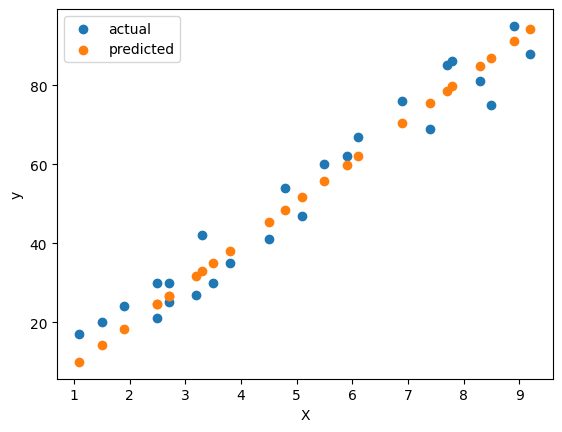

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X1, y, label='actual')
plt.scatter(X1, y_pred_all, label='predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

**Example 2: Calfornia Housing Data**

In [ ]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()
X=housing_data.data
y=housing_data.target
feature_names=housing_data.feature_names
target_names=housing_data.target_names
print('Feature names:', feature_names)
print('\nTarget names:', target_names)
print('\n Shape of dataset: (X)', X.shape)
print('\n Shape of dataset (y):', y.shape)


Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Target names: ['MedHouseVal']

 Shape of dataset: (X) (20640, 8)

 Shape of dataset (y): (20640,)


In [ ]:
import pandas as pd
df=pd.DataFrame(data=X, columns=feature_names)
df['House_Value']=y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House_Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House_Value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
from sklearn import preprocessing
import numpy as np
Data_Numpy=df.to_numpy()
min_max_scaler=preprocessing.MinMaxScaler()
Data_Numpy_Norm=min_max_scaler.fit_transform(Data_Numpy)
#print('This is the original data \n',Data_Numpy[5])
#print('This is the normalized data \n',Data_Numpy_Norm[5])
X_Norm=Data_Numpy_Norm[:,0:8]
y_Norm=Data_Numpy_Norm[:,8]


In [ ]:
X_Normalized=min_max_scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_Norm,y, test_size=0.3, random_state=40)
print('X_train size is',X_train.shape)
print('y_train size is',y_train.shape)

print('X_test size is',X_test.shape)
print('y_test size is',y_test.shape)

print('X size is',X_Norm.shape)
print('y size is',y_Norm.shape)


X_train size is (14448, 8)
y_train size is (14448,)
X_test size is (6192, 8)
y_test size is (6192,)
X size is (20640, 8)
y size is (20640,)


In [ ]:
#from sklearn.linear_model import LinearRegression
#Model=LinearRegression()
from sklearn.svm import SVR
Model=SVR(kernel='poly', degree=3)
Model.fit(X_train, y_train)
#print("Coefficients of the model are: \n", np.round(Model.coef_,2))
#print("Intercept value of the model is: \n", np.round(Model.intercept_,2))

SVR(kernel='poly')

In [ ]:
y_predicted=Model.predict(X_test)
print('First 10 values of y_test', y_test[0:10])
print('First 10 values of y_predicted', y_predicted[0:10])

First 10 values of y_test [2.265 1.962 1.458 4.2   2.578 1.441 3.474 1.854 4.321 2.882]
First 10 values of y_predicted [1.80938838 2.33092279 1.4311377  1.86890338 2.0928241  1.96680925
 2.72060697 1.46071822 3.12530257 3.05418809]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error:", round(mean_squared_error(y_test,y_predicted),2))
print("Coefficient of determination:", round(r2_score(y_test,y_predicted),2))

Mean squared error: 0.54
Coefficient of determination: 0.6
